<a href="https://colab.research.google.com/github/tarunpanda001/Machine_learning_Models/blob/main/linearRegression_Model_Cars24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 139MB/s]


In [45]:
df=pd.read_csv("cars24-car-price-cleaned.csv")

In [46]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [47]:
df.shape

(19820, 18)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

<Axes: xlabel='model', ylabel='selling_price'>

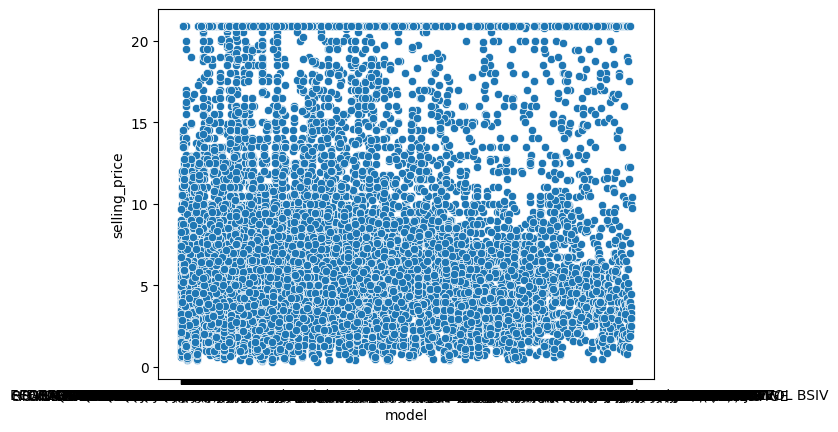

In [49]:
sns.scatterplot(x=df["model"],y=df["selling_price"])

## Objective

To predict the price of preowned cars

## Steps to follow

1. Preprocessing of the data (Encoding, Missing value treatment, Feature engineering, Outlier detection, duplicates, column treatment, Scaling)
2. Train

## 1. Preprocessing

### 1.1 Encoding of Categorical data

In [50]:
df.select_dtypes(include="object").columns

Index(['make', 'model'], dtype='object')

In [51]:
df["make"]=df.groupby("make")["selling_price"].transform("mean")
df["model"]=df.groupby("model")["selling_price"].transform("mean")

In [52]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  float64
 8   model             19820 non-null  float64
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

## MinMax Scaler (Normalization)

# [0 - 1]

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [55]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## Training the ML Model

### 2.1 Spliting the data into Training and Testing

In [56]:
from sklearn.model_selection import train_test_split


In [57]:
X=df.drop(columns=["selling_price"]) #Independent variables
y=df["selling_price"] #Dependent variables

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

- 70% of the data is for Training
- 30% of the data is for Testing

In [59]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((13874, 17), (13874,), (5946, 17), (5946,))

<Axes: xlabel='selling_price', ylabel='age'>

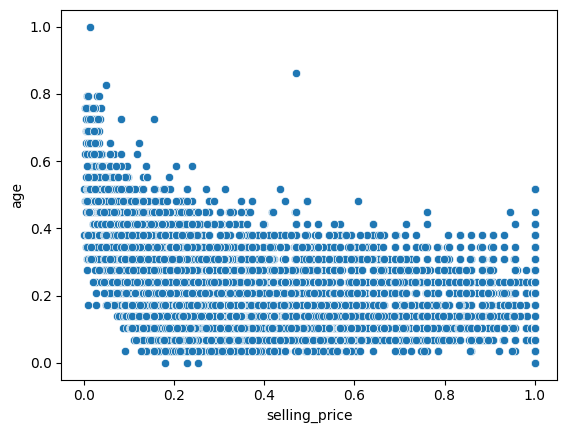

In [60]:
import seaborn as sns
sns.scatterplot(x=df["selling_price"],y=df["age"])

### 2.2 Univariate Model

In [61]:
X1=X[["model"]]
X1_train=X_train[["model"]]
X1_test=X_test[["model"]]

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model=LinearRegression()

In [64]:
X1_train.shape,y_train.shape

((13874, 1), (13874,))

In [65]:
model.fit(X1_train, y_train)

LinearRegression()

In [66]:
model.coef_

array([0.99881913])

In [67]:
model.intercept_

np.float64(0.0013006829185982505)

In [68]:
model.score(X1_train,y_train)

0.9365772433664862

In [69]:
model.score(X1,y)

0.9371390003908364

In [70]:
y_hat=model.predict(X1)

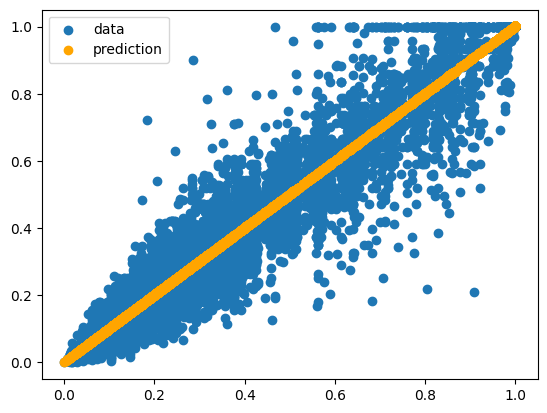

In [71]:
fig = plt.figure()
plt.scatter(X1,y,label='data')
plt.scatter(X1,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

### 2.3 Multivariate

In [72]:
X.shape,y.shape

((19820, 17), (19820,))

In [73]:
X_train.shape,y_train.shape

((13874, 17), (13874,))

In [74]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [75]:
model.coef_

array([ 0.12358025, -0.5640133 , -0.25897669,  0.08319302,  0.03142999,
       -0.12358025,  0.06902383,  0.85733269, -0.0062768 , -0.0105836 ,
        0.00569622,  0.11686505,  0.01498201, -0.00995931, -0.0048959 ,
       -0.01238884, -0.02063572])

In [76]:
model.intercept_

np.float64(-0.0020544363848234437)

In [77]:
y_hat=model.predict(X_test)

In [78]:
y_hat[:5]

array([0.22505866, 0.24876761, 0.26604925, 0.27739474, 0.07336503])

In [79]:
y_test[:5]

,selling_price
960,0.325203
4073,0.215993
4339,0.291227
19325,0.240262
438,0.087368


### Evaluation Metrics

In [80]:
model.score(X_train,y_train)

0.945747515652262

In [81]:
model.score(X_test,y_test)

0.9454380064781047

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MAE
mae = mean_absolute_error(y_test, y_hat)

# MSE
mse = mean_squared_error(y_test, y_hat)

# RMSE
rmse = np.sqrt(mse)

# R2 Score
r2 = r2_score(y_test, y_hat)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 0.036760511234598815
MSE: 0.0030220938300052993
RMSE: 0.05497357392425291
R2 Score: 0.9454380064781047


## Linear Regression From Scratch

In [83]:
import numpy as np

class LinearRegression():

    def __init__(self, learning_rate=0.01, iterations=5):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def update_weights(self):
        Y_pred = self.predict(self.X)

        # calculate gradients
        dW = - (2 * self.X.T.dot(self.Y - Y_pred)) / self.m
        db = - 2 * np.sum(self.Y - Y_pred) / self.m

        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return self

    def fit(self, X, Y):
        self.m, self.d = X.shape
        self.W = np.zeros(self.d)
        self.b = 0
        self.X = X
        self.Y = Y
        self.error_list = []

        for i in range(self.iterations):
            self.update_weights()
            Y_pred = self.predict(X)
            error = np.mean(np.square(Y - Y_pred))  # MSE
            self.error_list.append(error)

        return self

    def predict(self, X):
        return np.dot(X, self.W) + self.b

    def r2_score(self, X, y):
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - (ss_res / ss_total)
        return r2


In [84]:
lr = LinearRegression(iterations=1000)

In [85]:
lr.fit(X_train, y_train)

In [86]:
lr.predict(X_test)

array([0.2343408 , 0.26457266, 0.28977865, ..., 0.11749326, 0.2353042 ,
       0.45712181])

In [87]:
lr.r2_score(X_test, y_test)

np.float64(0.8665524058771203)

## OLS - Ordinary Least Square

In [88]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
y_train = np.array(y_train)

In [89]:
X_sm = sm.add_constant(X_train) # Statsmodel default is without intercept (wo), to add intercept use this code.

model_sm = sm.OLS(y_train, X_sm)

In [90]:
model_sm

In [91]:
results = model_sm.fit()

In [92]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.702e+04
Date:                Sun, 05 Oct 2025   Prob (F-statistic):               0.00
Time:                        06:42:16   Log-Likelihood:                 23454.
No. Observations:               15856   AIC:                        -4.687e+04
Df Residuals:                   15839   BIC:                        -4.674e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.803e+11   8.82e+10  